In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

attawapiskat ca
yellowknife ca
pevek ru
uarini br
albany au
camacha pt
dingle ie
leningradskiy ru
marcona pe
ambon id
lasa cn
albany au
albany au
busselton au
kodiak us
bethel us
cape town za
rikitea pf
yaan cn
ciudad bolivar ve
chuy uy
henties bay na
ribeira grande pt
nikolskoye ru
bengkulu id
punta arenas cl
avarua ck
koungheul sn
arraial do cabo br
warkworth nz
rawson ar
beya ru
butaritari ki
isangel vu
carnarvon au
new norfolk au
hadejia ng
gizo sb
prince rupert ca
vuktyl ru
rikitea pf
yellowknife ca
faanui pf
hihifo to
hermanus za
tuktoyaktuk ca
cherskiy ru
severo-yeniseyskiy ru
hasaki jp
mitsamiouli km
hobyo so
rikitea pf
torgau de
dondaicha in
cherskiy ru
katakwi ug
ushuaia ar
upernavik gl
hovd mn
provideniya ru
kieta pg
san cristobal ec
upernavik gl
vaitupu wf
punta arenas cl
bontang id
busselton au
castro cl
los llanos de aridane es
ouesso cg
vaitupu wf
tazovskiy ru
atuona pf
tasiilaq gl
grand river south east mu
miandrivazo mg
kapaa us
cherlak ru
pundaguitan ph
mayo ca
nizhni

hereford gb
nemuro jp
port elizabeth za
pevek ru
bluff nz
yellowknife ca
upernavik gl
jacareacanga br
dunedin nz
walvis bay na
atuona pf
bakani in
bredasdorp za
hermanus za
koungou yt
jamestown sh
barrow us
kapaa us
tasiilaq gl
tsagan aman ru
palabuhanratu id
tuktoyaktuk ca
ushuaia ar
dikson ru
cape town za
mataura pf
ushuaia ar
saskylakh ru
kavieng pg
coro ve
maseru ls
vaitupu wf
pevek ru
kapaa us
ushuaia ar
barrow us
launceston au
palana ru
mataura pf
awbari ly
fairbanks us
barrow us
podbelsk ru
chuy uy
hermanus za
saint-philippe re
dalvik is
zabid ye
khakhea bw
barentsburg sj
kysyl-syr ru
meulaboh id
busselton au
rikitea pf
rikitea pf
bereda so
hermanus za
simpang id
mount isa au
shagamu ng
nizhneyansk ru
pontianak id
vaini to
hailun cn
sadao th
illoqqortoormiut gl
nikolskoye ru
beringovskiy ru
zatoka ua
busselton au
longyan cn
ribeira grande pt
puerto ayora ec
albany au
hamilton bm
iqaluit ca
lafia ng
liberal us
sentyabrskiy ru
cabo san lucas mx
hithadhoo mv
ambilobe mg
ushuaia ar


marcona pe
barentsburg sj
samusu ws
ballina au
nuuk gl
busselton au
vaini to
ushuaia ar
mataura pf
ketchikan us
gunjur gm
rikitea pf
mataura pf
coracora pe
hermanus za
rikitea pf
new norfolk au
honiara sb
albany au
cape town za
tete mz
new norfolk au
falealupo ws
hermanus za
mana gf
saleaula ws
victoria sc
waw sd
the pas ca
chifeng cn
faanui pf
port blair in
kodiak us
dikson ru
san quintin mx
kieta pg
ushuaia ar
sao joao da barra br
toppenish us
ostrovnoy ru
clyde river ca
port elizabeth za
avarua ck
rikitea pf
magdagachi ru
vaini to
ixtapa mx
new norfolk au
bluff nz
ponta do sol cv
teguldet ru
ushuaia ar
albany au
nanortalik gl
foumban cm
bredasdorp za
severo-kurilsk ru
taolanaro mg
punta arenas cl
alakurtti ru
leningradskiy ru
waingapu id
illoqqortoormiut gl
hami cn
souillac mu
hermanus za
jamestown sh
mar del plata ar
hilo us
kununurra au
adre td
nizhneyansk ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | uarini
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | leningradskiy
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | ambon
Processing Record 11 of Set 1 | lasa
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | yaan
Processing Record 18 of Set 1 | ciudad bolivar
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | henties bay
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | ni

Processing Record 35 of Set 4 | pervomayskiy
Processing Record 36 of Set 4 | nagornyy
Processing Record 37 of Set 4 | fortuna
Processing Record 38 of Set 4 | aktash
Processing Record 39 of Set 4 | severo-kurilsk
Processing Record 40 of Set 4 | norrtalje
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | svetlaya
Processing Record 44 of Set 4 | dwarka
Processing Record 45 of Set 4 | alenquer
Processing Record 46 of Set 4 | bida
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | bac lieu
Processing Record 50 of Set 4 | kattivakkam
Processing Record 1 of Set 5 | ibra
Processing Record 2 of Set 5 | maues
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | verkhoyansk
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | agirish
Processing Record 8 of Set 5 | dagd

Processing Record 26 of Set 8 | tsagan aman
Processing Record 27 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 8 | coro
Processing Record 29 of Set 8 | maseru
Processing Record 30 of Set 8 | palana
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | podbelsk
City not found. Skipping...
Processing Record 33 of Set 8 | dalvik
Processing Record 34 of Set 8 | zabid
Processing Record 35 of Set 8 | khakhea
Processing Record 36 of Set 8 | kysyl-syr
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | bereda
Processing Record 39 of Set 8 | simpang
Processing Record 40 of Set 8 | shagamu
Processing Record 41 of Set 8 | pontianak
Processing Record 42 of Set 8 | hailun
Processing Record 43 of Set 8 | sadao
Processing Record 44 of Set 8 | zatoka
Processing Record 45 of Set 8 | longyan
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | lafia
Processing Record 48 of Set 8 | liberal
Processing Record 49 of

Processing Record 15 of Set 12 | woodbury
Processing Record 16 of Set 12 | bukachacha
Processing Record 17 of Set 12 | college
Processing Record 18 of Set 12 | lalsk
Processing Record 19 of Set 12 | axim
Processing Record 20 of Set 12 | njeru
Processing Record 21 of Set 12 | pemberton
Processing Record 22 of Set 12 | abong mbang
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | whakatane
Processing Record 25 of Set 12 | serdobsk
Processing Record 26 of Set 12 | ofaqim
Processing Record 27 of Set 12 | sovetskiy
Processing Record 28 of Set 12 | koshurnikovo
Processing Record 29 of Set 12 | afgoye
City not found. Skipping...
Processing Record 30 of Set 12 | lugovskiy
City not found. Skipping...
Processing Record 31 of Set 12 | usinsk
Processing Record 32 of Set 12 | marsh harbour
Processing Record 33 of Set 12 | cap-aux-meules
Processing Record 34 of Set 12 | toliary
City not found. Skipping...
Processing Record 35 of Set 12 | saint-georges
Processing Record 3

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,32.41,100,40,11.50,CA,2021-11-01 05:44:20
1,Pevek,69.7008,170.3133,3.70,95,100,6.40,RU,2021-11-01 05:45:12
2,Uarini,-2.9900,-65.1083,73.54,95,91,1.05,BR,2021-11-01 05:45:13
3,Albany,42.6001,-73.9662,53.80,82,36,10.76,US,2021-11-01 05:40:49
4,Camacha,33.0833,-16.3333,67.42,88,40,9.22,PT,2021-11-01 05:45:14
5,Dingle,10.9995,122.6711,84.43,75,68,14.34,PH,2021-11-01 05:45:14
6,Leningradskiy,69.3833,178.4167,-1.95,87,99,11.21,RU,2021-11-01 05:45:15
7,Ambon,-3.6954,128.1814,87.94,66,40,6.91,ID,2021-11-01 05:45:16
8,Lasa,46.6166,10.7002,48.94,99,98,4.14,IT,2021-11-01 05:45:17
9,Busselton,-33.6500,115.3333,62.04,48,77,22.26,AU,2021-11-01 05:45:18


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635746641.0921469

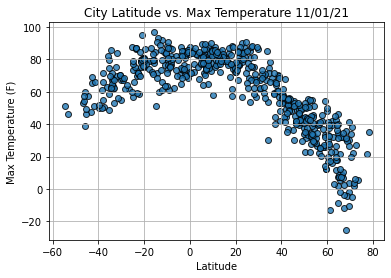

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

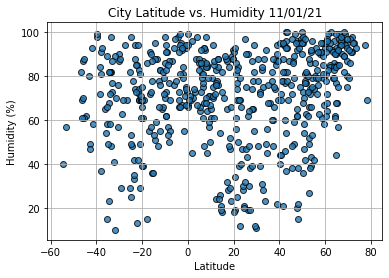

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

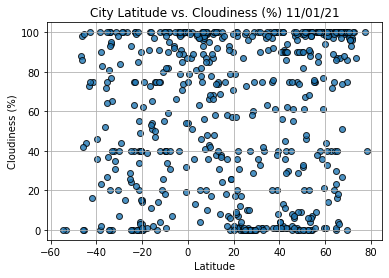

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

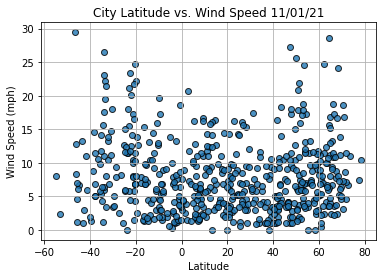

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()